<a href="https://colab.research.google.com/github/donskerclass/ComputationalMethodsClass/blob/main/Python/ChebpyIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chebyshev Approximation in Python
Here's some code to show what [chebpy](https://github.com/chebpy/chebpy) is and what it can do.

In [1]:
pip install git+https://github.com/chebpy/chebpy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/chebpy/chebpy.git to /tmp/pip-req-build-wqq3mv9k
  Running command git clone --filter=blob:none --quiet https://github.com/chebpy/chebpy.git /tmp/pip-req-build-wqq3mv9k
  Resolved https://github.com/chebpy/chebpy.git to commit ed2cb2eead146abf8e56591a5605782de6233a05
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from chebpy import chebfun

In [3]:
# optional plot settings
import matplotlib; import seaborn as sns
sns.set(font_scale=1.5); sns.set_style('whitegrid'); sns.set_palette('deep')
matplotlib.rc('figure', figsize=(9, 5), dpi=100)

In [4]:
#Define a function, which is just x=x, defined over domain [0,10]
x = chebfun('x', [0, 10])
x

chebfun column (1 smooth piece)
       interval       length     endpoint values
[       0,      10]        2         0       10
vertical scale =  10

In [5]:
#Define a new function, on previous domain
f = np.sin(x**2) 
f

chebfun column (1 smooth piece)
       interval       length     endpoint values
[       0,      10]      119         0    -0.51
vertical scale =   1

In [6]:
g = np.cos(x)

In [7]:
#Perform operations on functions
h = f + g**2
h

chebfun column (1 smooth piece)
       interval       length     endpoint values
[       0,      10]      119         1      0.2
vertical scale = 1.9

In [8]:
r = h.roots() #Calculate zeros of h
r

array([1.78518033, 2.39134546, 3.28523686, 3.36255571, 4.01641295,
       4.32509192, 4.68952781, 5.00494459, 5.35145267, 5.5523198 ,
       5.97456084, 6.03917748, 6.48999798, 6.54009173, 6.91604745,
       7.05137585, 7.32557634, 7.51240466, 7.72698535, 7.92632504,
       8.12687836, 8.30217645, 8.5236222 , 8.65215635, 8.91068722,
       8.98458363, 9.28413879, 9.30399898, 9.61308818, 9.64282737,
       9.91377761, 9.98662375])

In [9]:
h(r) #Evaluate at roots to verify

array([-4.44089210e-16, -1.33226763e-15, -1.11022302e-16,  0.00000000e+00,
        1.11022302e-16, -9.99200722e-16, -3.33066907e-16, -2.22044605e-15,
       -3.99680289e-15, -4.66293670e-15,  2.99760217e-15,  4.32986980e-15,
       -1.55431223e-15,  4.21884749e-15, -8.88178420e-16,  5.66213743e-15,
       -9.76996262e-15,  2.88657986e-15,  1.22124533e-15,  1.31006317e-14,
       -1.31006317e-14, -1.13242749e-14, -1.55431223e-15, -3.55271368e-15,
       -2.83106871e-15,  1.86517468e-14,  5.55111512e-16,  3.55271368e-15,
        6.66133815e-15, -3.66373598e-15,  9.76996262e-15,  2.55351296e-15])

In [10]:
hp = h.diff() #Derivative of h, also a Chebfun!
rp = hp.roots() #Critical points

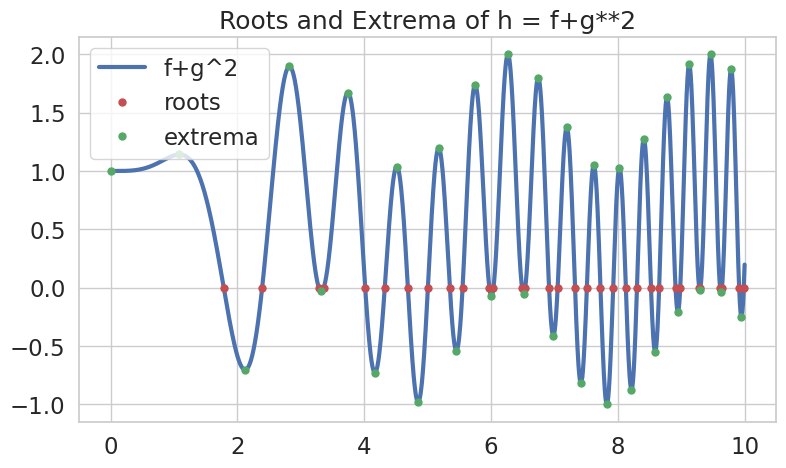

In [11]:
ax = h.plot(linewidth=3, label='f+g^2')
ax.plot(r, h(r), '.r', markersize=10, label='roots')
ax.plot(rp, h(rp), '.g', markersize=10, label='extrema')
ax.legend()
ax.set_title('Roots and Extrema of h = f+g**2')
plt.show()